In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import keras 
import sys 
from pandas import pandas as pd
import datetime 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
import os 
import glob 
import scipy as sp 
# skimage
from skimage.io import imshow, imread, imsave 
from skimage.transform import rotate, AffineTransform, warp,rescale, resize, downscale_local_mean
from skimage import color,data
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
# imgaug
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

import albumentations as A 
# Keras
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
#visualisation
import matplotlib.image as mpimg

from IPython.display import HTML, Image
import cv2 
import matplotlib.ticker as ticker



p_train=pd.read_csv('/content/drive/My Drive/plant_pathology_2020/train.csv') # Data yükleme işlemleri csv dosyayı okuma.
p_test=pd.read_csv('/content/drive/My Drive/plant_pathology_2020/test.csv')

In [ ]:
target = p_train[['healthy', 'multiple_diseases', 'rust', 'scab']] 
test_ids = p_test['image_id'] 

img_size=224

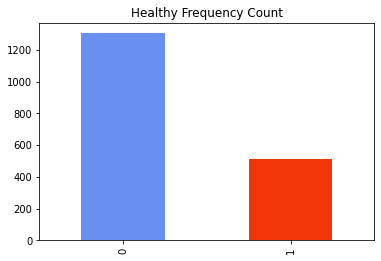

In [ ]:
colors=['#6890F0','#f23409'] 
p_train['healthy'].value_counts().plot(kind='bar',title='Healthy Frequency Count',color=colors) 

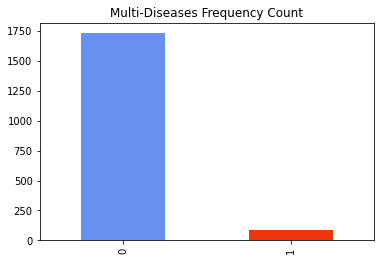

In [ ]:
p_train['multiple_diseases'].value_counts().plot(kind='bar',title='Multi-Diseases Frequency Count',color=colors) 

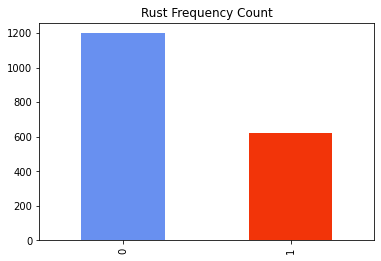

In [ ]:
p_train['rust'].value_counts().plot(kind='bar',title='Rust Frequency Count',color=colors) 

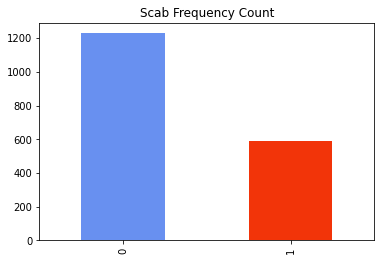

In [ ]:
p_train['scab'].value_counts().plot(kind='bar',title='Scab Frequency Count',color=colors) 

healthy contains 516 samples
multiple_diseases contains 91 samples
rust contains 622 samples
scab contains 592 samples



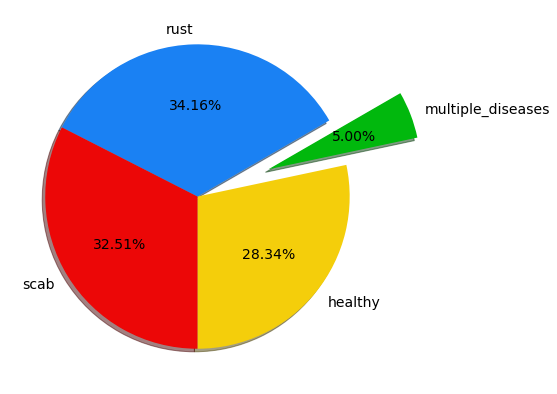

In [ ]:
labels = ["healthy","multiple_diseases","rust","scab"]
classProb =np.zeros(len(labels))
idx = 0
for k in labels:
    print(f"{k} contains {p_train[k].sum()} samples")
    classProb[idx] = p_train[k].sum()
    idx+=1

# Visualizing the results in a pie-chart:
print() #Empty line before figure
color = ['#F4CE0B','#01B80D','#1A81F3', '#EC0707'] 
plt.figure(figsize=(15,7))
plt.pie(classProb, shadow=True, explode=[0,0.5, 0, 0],labels=labels,
        autopct='%1.2f%%', colors=color, startangle=-90,
        textprops={'fontsize': 14})

class_weight_vect =np.square(1 / (classProb/classProb.sum()) )# Calculate the weight per classbased on the prior probability dervied from the training data.
class_weight_vect=class_weight_vect/np.min(class_weight_vect) 

/content/drive/My Drive/plant_pathology_2020/images/Train_0.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_1.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_2.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_3.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_4.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_5.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_6.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_7.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_8.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_9.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_10.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_11.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_12.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_13.jpg
/content/drive/My Drive/plant_pathology_2020/images/Train_14.jpg
/content/drive/My Drive/plant_patho

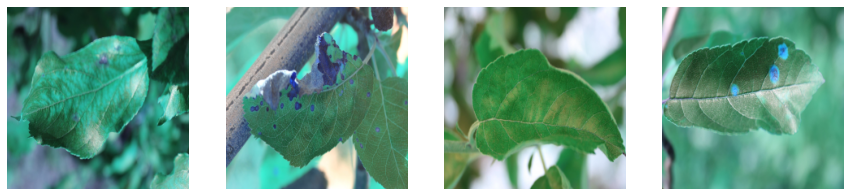

In [ ]:
train_image=[]

for name in p_train['image_id']:
    path='/content/drive/My Drive/plant_pathology_2020/images/'+name+'.jpg'
    print(path)
   
    img=cv2.imread(path)
    
    img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    
    train_image.append(img)

fig, ax = plt.subplots(1, 4, figsize=(15, 15)) 


if len(train_image) > 0:
  for i in range(4):
      ax[i].set_axis_off()
      ax[i].imshow(train_image[i])
    

/content/drive/My Drive/plant_pathology_2020/images/Test_0.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_1.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_2.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_3.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_4.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_5.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_6.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_7.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_8.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_9.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_10.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_11.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_12.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_13.jpg
/content/drive/My Drive/plant_pathology_2020/images/Test_14.jpg
/content/drive/My Drive/plant_pathology_2020/image

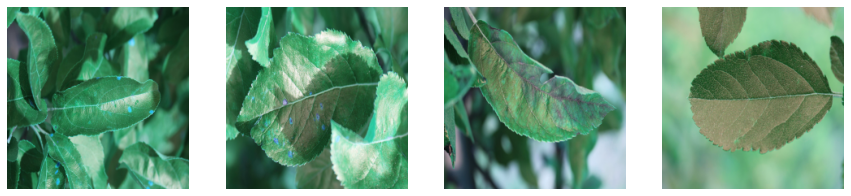

In [ ]:
test_image=[]

for name in p_test['image_id']:
    path='/content/drive/My Drive/plant_pathology_2020/images/'+name+'.jpg'

    print(path)
    img=cv2.imread(path)
    img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_image.append(img)
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(test_image[i])  


In [ ]:

from keras.preprocessing.image import img_to_array 

x_train = np.ndarray(shape=(len(train_image), img_size, img_size, 3),dtype = np.float32) # numpy kütüphanesinde float32 tipini kullanarak "img_size" kadar yeni liste oluşturur.
i=0

for image in train_image:
    x_train[i]=img_to_array(image)
    x_train[i]=train_image[i]
    i=i+1
x_train=x_train/255
print('Train Shape: {}'.format(x_train.shape))

x_test = np.ndarray(shape=(len(test_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in test_image:
    x_test[i]=img_to_array(image)
    x_test[i]=test_image[i]
    i=i+1
    
x_test=x_test/255
print('Test Shape: {}'.format(x_test.shape))

Train Shape: (1821, 224, 224, 3)
Test Shape: (1821, 224, 224, 3)


In [ ]:
y = p_train.copy()
del y['image_id'] 
y.head()

y_train = np.array(y.values)
print(y_train.shape,y_train[0])

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

x_train.shape, x_val.shape, y_train.shape, y_val.shape



(1821, 4) [0 0 0 1]


((1456, 224, 224, 3), (365, 224, 224, 3), (1456, 4), (365, 4))

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 0) 
 
x_train, y_train = sm.fit_resample(x_train.reshape((-1, img_size * img_size * 3)), y_train)
x_train = x_train.reshape((-1, img_size, img_size, 3))
x_train.shape, y_train.sum(axis=0)
#plt.scatter(x_train, y_train)
#plt.legend()
#plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

((1960, 224, 224, 3), array([490, 490, 490, 490]))

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
LR_reduce=ReduceLROnPlateau(monitor='val_accuracy',
                            factor=.5,
                            patience=10,
                            min_lr=.000001,
                            verbose=1)

ES_monitor=EarlyStopping(monitor='val_loss',
                          patience=20)

reg = .0005

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
batch_normalization_33 (Batc (None, 220, 220, 32)      96        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 216, 216, 128)     102528    
_________________________________________________________________
batch_normalization_34 (Batc (None, 216, 216, 128)     384       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 108, 108, 128)     0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 108, 108, 128)     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 106, 106, 32)     

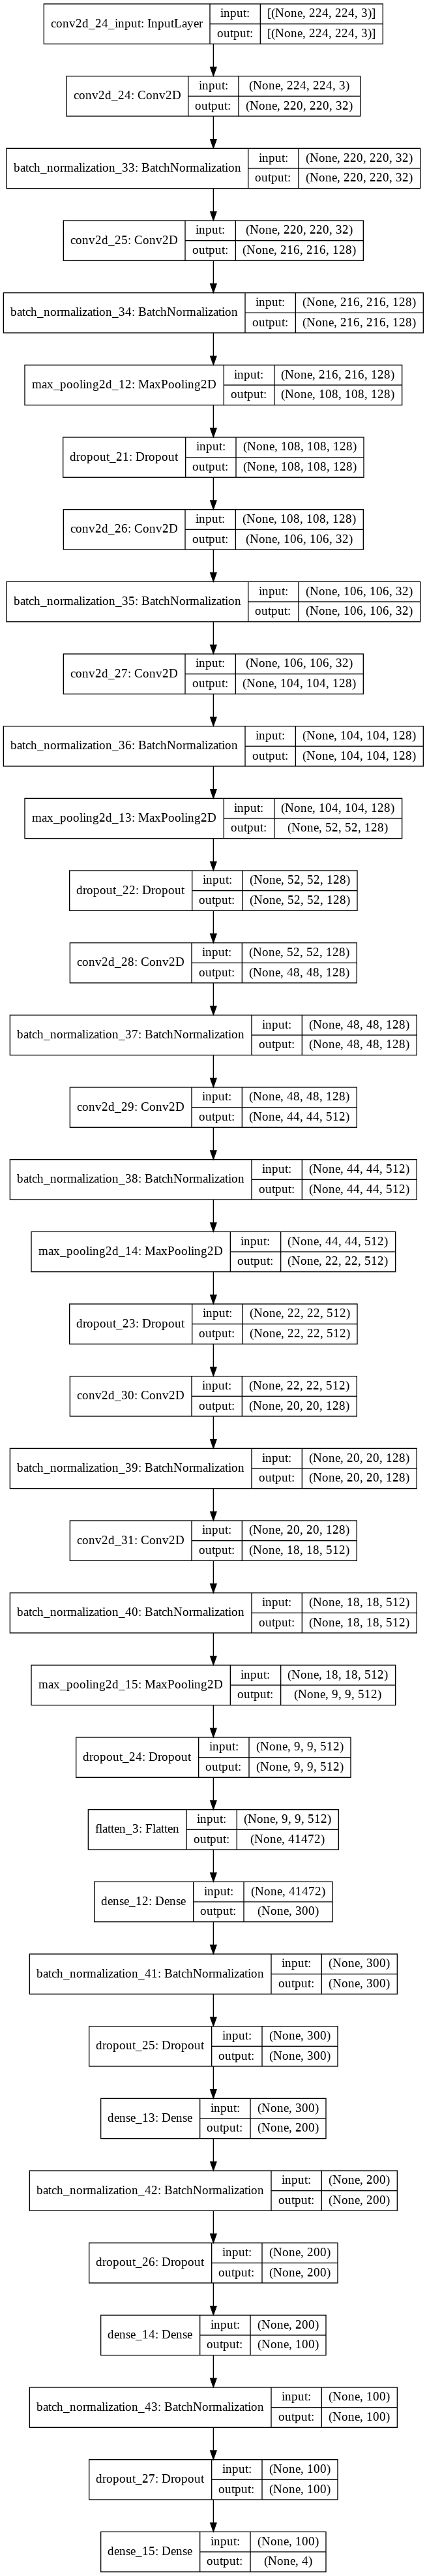

In [ ]:
from keras.models import Model, Sequential, load_model, Input
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.regularizers import l2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras import optimizers

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),activation='relu', input_shape=(img_size, img_size, 3), kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(128, kernel_size=(5,5),activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))

model.add(Conv2D(32, kernel_size=(3,3),activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))


model.add(Conv2D(128, kernel_size=(5,5),use_bias=True,activation='relu', kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(512, kernel_size=(5,5),use_bias=True,activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))

model.add(Conv2D(128, kernel_size=(3,3),use_bias=True,activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Conv2D(512, kernel_size=(3,3),use_bias=True,activation='relu',kernel_regularizer=l2(reg)))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(.25))


model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(200,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization(axis=-1,center=True,scale=False))
model.add(Dropout(.25))
model.add(Dense(4,activation='softmax'))


model.summary()

from keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
datagen = ImageDataGenerator(rotation_range=45, 
                             shear_range=.25,
                              zoom_range=.25,
                              width_shift_range=.25,
                              height_shift_range=.25,
                              rescale=1/255,
                              brightness_range=[.5,1.5],
                              horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='nearest'
                              )

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=24),
                              epochs=100,
                              steps_per_epoch=x_train.shape[0] // 24,
                              verbose=1,
                              callbacks=[ES_monitor,LR_reduce],
                              validation_data=datagen.flow(x_val, y_val,batch_size=24),
                              validation_steps=x_val.shape[0]//24
                              )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
81/81 [==============================] - 36s 441ms/step - loss: 1.0833 - accuracy: 0.5610 - val_loss: 1.2286 - val_accuracy: 0.5139
Epoch 2/100
81/81 [==============================] - 36s 440ms/step - loss: 1.0235 - accuracy: 0.5894 - val_loss: 1.1715 - val_accuracy: 0.5167
Epoch 3/100
81/81 [==============================] - 36s 442ms/step - loss: 0.9886 - accuracy: 0.5878 - val_loss: 0.9140 - val_accuracy: 0.6611
Epoch 4/100
81/81 [==============================] - 36s 441ms/step - loss: 0.9431 - accuracy: 0.6250 - val_loss: 0.9010 - val_accuracy: 0.6000
Epoch 5/100
81/81 [==============================] - 36s 441ms/step - loss: 0.9015 - accuracy: 0.6384 - val_loss: 0.8201 - val_accuracy: 0.6750
Epoch 6/100
81/81 [==============================] - 36s 443ms/step - loss: 0.8721 - accuracy: 0.6674 - val_loss: 0.7747 - val_accuracy: 0.6917
Epoch 7/100
81/81 [==============================] - 36s 442ms/step - loss: 0.8428 - accuracy: 0.6870 - val_loss: 0.7521 - val_accuracy:

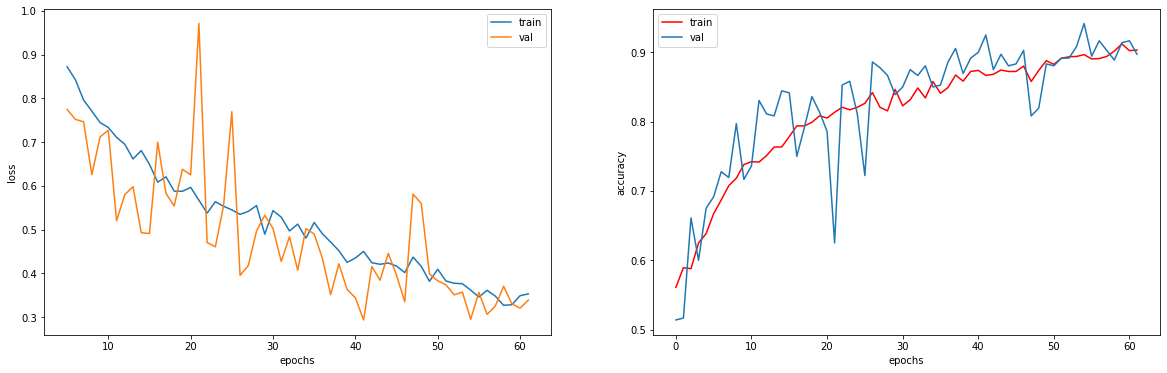

0.994
0.925
0.998
0.990
totally:0.977


In [ ]:
from matplotlib import pyplot as plt

h = history.history

offset = 5
epochs = range(offset, len(h['loss']))

plt.figure(1, figsize=(20, 6))

plt.subplot(121)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, h['loss'][offset:], label='train')
plt.plot(epochs, h['val_loss'][offset:], label='val')
plt.legend()

plt.subplot(122)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(h[f'accuracy'], label='train',color='red')
plt.plot(h[f'val_accuracy'], label='val')
plt.legend()

plt.show()

from sklearn.metrics import roc_auc_score

pred_test = model.predict(x_val) 
roc_sum = 0
for i in range(4):
    score = roc_auc_score(y_val[:, i], pred_test[:, i])
    roc_sum += score
    print(f'{score:.3f}')

roc_sum /= 4
print(f'totally:{roc_sum:.3f}')



In [ ]:
pred = model.predict(x_test) 


res = pd.DataFrame()
res['image_id'] = test_ids
res['healthy'] = pred[:, 0]
res['multiple_diseases'] = pred[:, 1]
res['rust'] = pred[:, 2]
res['scab'] = pred[:, 3]
res.to_csv('submission.csv', index=False)
res.head(10)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.008387,0.035600,0.949080,0.006933
1,Test_1,0.021301,0.026739,0.938603,0.013358
2,Test_2,0.061554,0.025913,0.003063,0.909469
3,Test_3,0.989161,0.000281,0.006551,0.004007
4,Test_4,0.008681,0.041590,0.935677,0.014052
5,Test_5,0.742859,0.157326,0.017100,0.082715
6,Test_6,0.964232,0.000911,0.027706,0.007152
7,Test_7,0.003772,0.063352,0.005045,0.927831
8,Test_8,0.091524,0.540013,0.048676,0.319787
9,Test_9,0.010060,0.010504,0.975001,0.004435
